In [6]:
import matplotlib.pyplot as plt

In [68]:
DATA = {
    'HOH-like': 230_000,
    'RARE_LIGAND': 65_000,
    'SO4-like': 55_000,
    'GOL-like': 25_000,
    'EDO-like': 24_000,
    'ZN-like': 23_000,
    'CA-like': 22_000,
    'MG-like': 21_000,
    'CL-like': 20_000,
    'NAG': 12_500
}

VALUES = [value/10_000 for value in DATA.values()]
LABELS = [name for name in DATA.keys()]

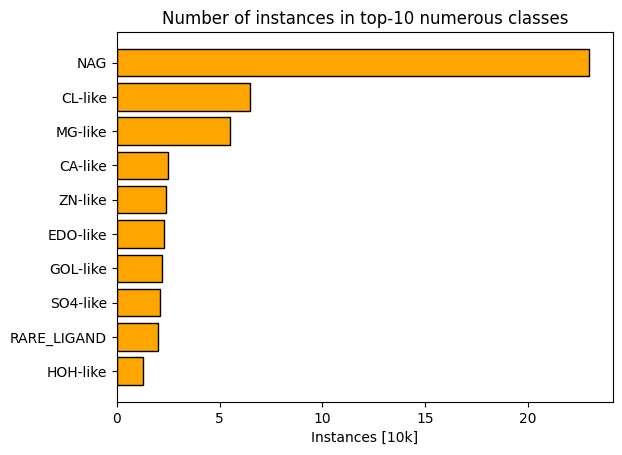

In [69]:
plt.barh(LABELS, VALUES[::-1], color = 'Orange', edgecolor='Black')
plt.title('Number of instances in top-10 numerous classes')
plt.xlabel('Instances [10k]')
plt.show()

In [70]:
import numpy as np
import pandas as pd
import shapefile as shp
import seaborn as sns

In [86]:
sns.set(style='whitegrid', palette='pastel', color_codes=True)
sns.mpl.rc('figure', figsize=(10,6))

In [87]:
shpPath = './Maps/ne_10m_admin_0_boundary_lines_land.shp'
sf = shp.Reader(shpPath)

In [90]:
def readShapefile(sf):
    fields = [x[0] for x in sf.fields][1:]

    records = [list(i) for i in sf.records()]
    shps = [s.points for s in sf.shapes()]

    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

def plotShape(id, s=None):
    plt.figure()
    #plotting the graphical axes where map ploting will be done
    ax = plt.axes()
    ax.set_aspect('equal')
#storing the id number to be worked upon
    shape_ex = sf.shape(id)
#NP.ZERO initializes an array of rows and column with 0 in place of each elements 
    #an array will be generated where number of rows will be(len(shape_ex,point))and number of columns will be 1 and stored into the variable
    x_lon = np.zeros((len(shape_ex.points),1))
#an array will be generated where number of rows will be(len(shape_ex,point))and number of columns will be 1 and stored into the variable
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
#plotting using the derived coordinated stored in array created by numpy
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
# use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

In [ ]:
df = readShapefile(sf)

In [92]:
df.sample(5)

,FEATURECLA,NAME,COMMENT,ADM0_USA,ADM0_LEFT,ADM0_RIGHT,ADM0_A3_L,ADM0_A3_R,SOV_A3_L,SOV_A3_R,...,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,ne_id,BRK_A3,FCLASS_OSM,FCLASS_TLC,coords
331,International boundary (verify),,,1,Palestine,Egypt,PSX,EGY,ISR,EGY,...,,,,,,1746707921,,,,"[(34.200269441306034, 31.314266688845734), (34..."
328,International boundary (verify),,,1,Israel,Jordan,ISR,JOR,ISR,JOR,...,,,,,,1746707901,,,,"[(35.611757849000156, 32.681900396000074), (35..."
160,International boundary (verify),,,1,Swaziland,Mozambique,SWZ,MOZ,SWZ,MOZ,...,,,,,,1746706521,,,,"[(32.11388431800009, -26.840014342999936), (32..."
165,International boundary (verify),,,1,France,Spain,FRA,ESP,FR1,ESP,...,,,,,,1746706567,,,,"[(1.707006470000067, 42.50278147400006), (1.71..."
260,International boundary (verify),,,1,Lesotho,South Africa,LSO,ZAF,LSO,ZAF,...,,,,,,1746707425,,,,"[(28.980845581000068, -28.909035338999985), (2..."


In [94]:
DIST_NAME = 'JAIPUR'
#to get the id of the city map to be plotted
com_id = df[df.DIST_NAME == 'JAIPUR'].index.get_values()[0]
plotShape(com_id, DIST_NAME)
sf.shape(com_id)

AttributeError: 'DataFrame' object has no attribute 'DIST_NAME'